# DSI-13 Project 2 Regression Challenge on HDB Prices

### Title:
Unveiling key drivers of HDB Resale Prices in Singapore for enhanced data-driven decision making

### Background:
Shokuniwa RealEstate Insights Pte Ltd is a real estate consultancy firm specializing in providing data-driven insights to assist in making informed decisions in the dynamic Singapore housing market.

### Problem Statement:
While Shokuniwa RealEstate Insights Pte Ltd specializes in new developments, they are currently looking to expand their influence in the Singapore HDB resale market. Hence, the company is looking for a viable solution to predict market prices for resale HDB apartments, which will allow their agents to have an estimate of the resale prices for their current listings and price them feasibly.

### Objectives:
1. Identify the most significant features influencing HDB resale prices: Through rigorous feature selection techniques, pinpoint the key factors driving housing prices.
2. Develop a highly accurate regression model to predict resale prices. The goal of our data prediction model is to empower the client Company's real estate agents with swift and efficient, data-driven, and highly reliable resale price predictions.

### Expected Outcomes:
1. Accurate Predictive Model: A robust regression model that delivers the highest accuracy in predicting HDB resale prices, equipped with clear metrics on its performance.
2. To present the insights and models to the company's panel, which includes C-Suite Executives and Senior Management.
</br>(A 30 min slot has been secured with the panel for the presentation.)

### Table of Contents:
1. Data Preprocessing (Pre-Train Test Split)</br>
2. Exploratory Data Analysis</br>
3. Data Splitting</br>
4. Baseline Model Performance (Linear Regression)</br>
5. Feature Engineering</br>
6. Model Development (Linear Regression, Lasso, Ridge)</br>
7. Competition Submission</br>


Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import xgboost as xgb

from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

palette = sns.color_palette('pastel')

In [2]:
palette

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

Loading Datasets

In [3]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Define Scoring Metrics (RMSE)

In [4]:
def scorer(true, pred):
    score = mean_squared_error(true, pred) ** 0.5
    
    return score

Create scores dictionary for comparison

In [5]:
scores_dict = {}

### 1. Data Preprocessing

#### 1.1 An overview of the dataset

Viewing the dataset and gathering info on the type of data that we have, including which features need to be cleaned up, which features to be selected, etc.

In [6]:
train_df.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,88471,2016-05,KALLANG/WHAMPOA,4 ROOM,3B,UPP BOON KENG RD,10 TO 12,90.0,Model A,2006,...,78,1,1.317659,103.882504,1138.633422,Geylang Methodist School,224,0,1.317659,103.882504
1,122598,2012-07,BISHAN,5 ROOM,153,BISHAN ST 13,07 TO 09,130.0,Improved,1987,...,45,1,1.349783,103.854529,447.894399,Kuo Chuan Presbyterian Secondary School,232,0,1.350110,103.854892
2,170897,2013-07,BUKIT BATOK,EXECUTIVE,289B,BT BATOK ST 25,13 TO 15,144.0,Apartment,1997,...,39,0,1.345245,103.756265,180.074558,Yusof Ishak Secondary School,188,0,1.342334,103.760013
3,86070,2012-04,BISHAN,4 ROOM,232,BISHAN ST 22,01 TO 05,103.0,Model A,1992,...,20,1,1.354789,103.844934,389.515528,Catholic High School,253,1,1.354789,103.844934
4,153632,2017-12,YISHUN,4 ROOM,876,YISHUN ST 81,01 TO 03,83.0,Simplified,1987,...,74,0,1.416280,103.838798,312.025435,Orchid Park Secondary School,208,0,1.414888,103.838335


In [7]:
test_df.head()

,id,Tranc_YearMonth,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,...,vacancy,pri_sch_affiliation,pri_sch_latitude,pri_sch_longitude,sec_sch_nearest_dist,sec_sch_name,cutoff_point,affiliation,sec_sch_latitude,sec_sch_longitude
0,114982,2012-11,YISHUN,4 ROOM,173,YISHUN AVE 7,07 TO 09,84.0,Simplified,1987,...,92,0,1.433681,103.832924,156.322353,Ahmad Ibrahim Secondary School,218,0,1.436235,103.829987
1,95653,2019-08,JURONG WEST,5 ROOM,986C,JURONG WEST ST 93,04 TO 06,112.0,Premium Apartment,2008,...,45,0,1.339244,103.698896,739.371688,Jurong West Secondary School,199,0,1.335256,103.702098
2,40303,2013-10,ANG MO KIO,3 ROOM,534,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,...,36,0,1.371893,103.851811,305.071191,Anderson Secondary School,245,0,1.374242,103.851430
3,109506,2017-10,WOODLANDS,4 ROOM,29,MARSILING DR,01 TO 03,97.0,New Generation,1979,...,54,0,1.434423,103.773698,433.454591,Woodlands Secondary School,188,0,1.439183,103.774499
4,100149,2016-08,BUKIT BATOK,4 ROOM,170,BT BATOK WEST AVE 8,16 TO 18,103.0,Model A,1985,...,40,0,1.349195,103.741000,217.295361,Bukit Batok Secondary School,223,0,1.348351,103.740873


In [8]:
train_df.info(), test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         150634 non-null  int64  
 1   Tranc_YearMonth            150634 non-null  object 
 2   town                       150634 non-null  object 
 3   flat_type                  150634 non-null  object 
 4   block                      150634 non-null  object 
 5   street_name                150634 non-null  object 
 6   storey_range               150634 non-null  object 
 7   floor_area_sqm             150634 non-null  float64
 8   flat_model                 150634 non-null  object 
 9   lease_commence_date        150634 non-null  int64  
 10  resale_price               150634 non-null  float64
 11  Tranc_Year                 150634 non-null  int64  
 12  Tranc_Month                150634 non-null  int64  
 13  mid_storey                 15

(None, None)

#### 1.2 Selection of Features
From the data info and dictionary, we found several columns which are duplicates or are similar and having all the columns would not add value to the regression model. On the contrary, they may cause multicollinearity issues within the dataset. For eg. the column Tranc_YearMonth are dates consisting of the year and month of the transaction, which is actually already split into Tranc_Year and Tranc_Month. Another example is the hdb_age which is actually derived from the year_completed column.

There are also several columns which may not bring value to the regression model, or are 'open format' strings. One example is the id and address columns. They will be dropped as well.

In [9]:
# Selecting only useful columns for the prediction of resale prices & separating target values in training dataset

y = train_df['resale_price']

train_dropped = train_df[['flat_type', 'mid', 'floor_area_sqm', 'flat_model', 'Tranc_Year', 'hdb_age',
                          'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'planning_area',
                          'Mall_Nearest_Distance', 'Hawker_Nearest_Distance', 'mrt_nearest_distance', 'bus_interchange',
                          'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist', 'total_dwelling_units',
                          'max_floor_lvl', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental']]

test_dropped = test_df[['flat_type', 'mid', 'floor_area_sqm', 'flat_model', 'Tranc_Year', 'hdb_age',
                          'commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'planning_area',
                          'Mall_Nearest_Distance', 'Hawker_Nearest_Distance', 'mrt_nearest_distance', 'bus_interchange',
                          'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist', 'total_dwelling_units',
                          'max_floor_lvl', '1room_rental', '2room_rental', '3room_rental', 'other_room_rental']]

In [10]:
train_dropped.info(), test_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   flat_type                  150634 non-null  object 
 1   mid                        150634 non-null  int64  
 2   floor_area_sqm             150634 non-null  float64
 3   flat_model                 150634 non-null  object 
 4   Tranc_Year                 150634 non-null  int64  
 5   hdb_age                    150634 non-null  int64  
 6   commercial                 150634 non-null  object 
 7   market_hawker              150634 non-null  object 
 8   multistorey_carpark        150634 non-null  object 
 9   precinct_pavilion          150634 non-null  object 
 10  planning_area              150634 non-null  object 
 11  Mall_Nearest_Distance      149805 non-null  float64
 12  Hawker_Nearest_Distance    150634 non-null  float64
 13  mrt_nearest_distance       15

(None, None)

In [11]:
train_dropped.head()

,flat_type,mid,floor_area_sqm,flat_model,Tranc_Year,hdb_age,commercial,market_hawker,multistorey_carpark,precinct_pavilion,...,bus_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,sec_sch_nearest_dist,total_dwelling_units,max_floor_lvl,1room_rental,2room_rental,3room_rental,other_room_rental
0,4 ROOM,11,90.0,Model A,2016,15,N,N,N,N,...,0,29.427395,1138.633422,1138.633422,142,25,0,0,0,0
1,5 ROOM,8,130.0,Improved,2012,34,N,N,N,N,...,1,58.207761,415.607357,447.894399,112,9,0,0,0,0
2,EXECUTIVE,14,144.0,Apartment,2013,24,N,N,N,N,...,1,214.747860,498.849039,180.074558,90,16,0,0,0,0
3,4 ROOM,3,103.0,Model A,2012,29,Y,N,N,N,...,1,43.396521,389.515528,389.515528,75,11,0,0,0,0
4,4 ROOM,2,83.0,Simplified,2017,34,N,N,N,N,...,0,129.422752,401.200584,312.025435,48,4,0,0,0,0


#### 1.3 Imputing missing values and group planning areas into 5 planning zones

We find that for the Mall_Nearest_Distance column, there are a number of missing values. While the number is less than 1000 out of about 150000 data (less than 1%), we have some domain knowledge on this issue and take the most frequent distance to be imputed. Reason being HDB flats are generally planned to be built in groups with a nearby amenities for each group, and this includes a Mall. We also found that the planning_area column has values from 55 different areas in Singapore. We will group this into the 5 main planning zones as per the government's master plan.

**Mall_Nearest_Distance** </br>
_As the values are distances, the missing and '0' values will be imputed with the distance of the bin with highest number of counts. As the values are floats, the mode of the data may not be accurate, hence we separate the data into bins and pick the most common bin._</br>

**planning_area** </br>
_There are a total of 55 planning areas in Singapore, grouped into 5 planning zones, namely North, North-East, East, Central and West. From the 55 different areas, we will group them into the 5 zones instead, as the prices of the HDB flats are general similar within each zone._

Bin with the highest count: 398.58993173999994


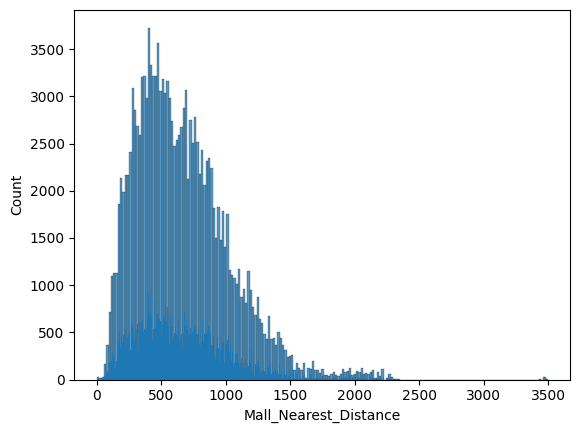

In [12]:
ax = sns.histplot(train_dropped.Mall_Nearest_Distance)
counts, bins, _ = ax.hist(train_dropped.Mall_Nearest_Distance, bins=1000)
max_count_bin = bins[counts.argmax()]

print("Bin with the highest count:", max_count_bin)

In [13]:
train_dropped.planning_area.unique()

array(['Kallang', 'Bishan', 'Bukit Batok', 'Yishun', 'Geylang', 'Hougang',
       'Bedok', 'Sengkang', 'Tampines', 'Serangoon', 'Bukit Merah',
       'Bukit Panjang', 'Woodlands', 'Jurong West', 'Toa Payoh',
       'Choa Chu Kang', 'Sembawang', 'Novena', 'Ang Mo Kio', 'Pasir Ris',
       'Clementi', 'Punggol', 'Jurong East', 'Rochor', 'Queenstown',
       'Bukit Timah', 'Outram', 'Tanglin', 'Marine Parade',
       'Western Water Catchment', 'Downtown Core', 'Changi'], dtype=object)

#### 1.4 Creating a class/function box

We will create a class/function box to include all the functions that will be called several times throughout the process. This central location makes it easier to view and modify the functions when needed, instead of having the functions scattered throughout the script. This will also allow for easier reference when Pipelines are being built.

In [14]:
# Impute Missing Values

def impute_missing(df):
    df.Mall_Nearest_Distance = df.Mall_Nearest_Distance.map(lambda x: 399 if (x == 0 or pd.isna(x)) else x)

    return df

# Zonalize Planning Areas

def zones(df):
    mapping = {
        'North' : ['Kallang', 'Central Water Catchment', 'Lim Chu Kang', 'Mandai', 'Sembawang', 'Simpang', 'Sungei Kadut', 'Woodlands', 'Yishun'],
        'NorthEast' : ['Ang Mo Kio', 'Hougang', 'North-Eastern Islands', 'Punggol', 'Seletar', 'Sengkang', 'Serangoon'],
        'Central' : ['Bishan', 'Bukit Merah', 'Bukit Timah', 'Downtown Core', 'Geylang', 'Kallang', 'Marina East', 'Marina South',
                     'Marine Parade', 'Museum', 'Newton', 'Novena', 'Orchard', 'Outram', 'Queenstown', 'River Valley', 'Rochor',
                     'Singapore River', 'Southern Islands', 'Straits View', 'Tanglin', 'Toa Payoh'],
        'East' : ['Bedok', 'Changi', 'Changi Bay', 'Pasir Ris', 'Paya Lebar', 'Tampines'],
        'West' : ['Boon Lay', 'Bukit Batok', 'Bukit Panjang', 'Choa Chu Kang', 'Clementi', 'Jurong East', 'Jurong West', 'Pioneer',
                  'Tengah', 'Tuas', 'Western Islands', 'Western Water Catchment']
    }

    planning_area_mapping = {area: region for region, areas in mapping.items() for area in areas}
    df['planning_area'] = df['planning_area'].map(planning_area_mapping)

    return df

# Scaling columns

def scaler(df):
    scaled = StandardScaler()

    col_names = df.columns.tolist()

    cols_to_scale = ['mid', 'floor_area_sqm', 'hdb_age', 'Mall_Nearest_Distance', 'Hawker_Nearest_Distance', 'mrt_nearest_distance', 
                  'bus_stop_nearest_distance', 'pri_sch_nearest_distance', 'sec_sch_nearest_dist', 'total_dwelling_units', 'max_floor_lvl',
                  '1room_rental', '2room_rental', '3room_rental', 'other_room_rental']
    
    ct = ColumnTransformer(
        transformers=[
            ('scale', scaled, cols_to_scale)
        ],
        remainder = 'passthrough'
    )

    scaled_data = ct.fit_transform(df)

    balance_cols = [name for name in col_names if name not in cols_to_scale]

    scaled_col_names = cols_to_scale + balance_cols

    df_scaled = pd.DataFrame(scaled_data, columns = scaled_col_names)

    df_scaled[cols_to_scale] = df_scaled[cols_to_scale].astype(float)
    
    return df_scaled

# One Hot Encoding columns

def ohe(df):
    cols_encode = ['flat_type', 'flat_model', 'Tranc_Year', 'planning_area']

    df = pd.get_dummies(df, columns=cols_encode, drop_first = True, dtype=int)

    return df

# Convert "pre-encoded" objects (Y or N columns) to int

def to_int(df):
    cols_to_int = ['commercial', 'market_hawker', 'multistorey_carpark', 'precinct_pavilion', 'bus_interchange']

    df[cols_to_int] = df[cols_to_int].map(lambda x: 0 if (x == 'N' or x == 0) else 1)

    return df

# Create Squares and Cubes of values in the first 14 columns

def square_cube(df):
    
    selected_df = df.iloc[:, 0:14].copy()
    squared_df = selected_df.applymap(lambda x: x**2)
    cubed_df = selected_df.applymap(lambda x: x**3)
    squared_df = squared_df.rename(columns = lambda x: x + '_squared')
    cubed_df = cubed_df.rename(columns = lambda x: x + '_cubed')

    newdf = pd.concat([df, squared_df, cubed_df], axis=1)
    return newdf

#### 1.5 Creating Pipeline for preprocessing (Pre-Train Test Split) and push the datasets through

After pushing the dataset through the pipeline, we will do a final sanity check on the cleaned data and follow up on any other anomalies

In [15]:
preprocessing_pipe = Pipeline([
        ('impute', FunctionTransformer(impute_missing, validate=False)),
        ('zonalize', FunctionTransformer(zones, validate=False)),
        ('one-hot encoding', FunctionTransformer(ohe, validate=False)),
        ('convert to int', FunctionTransformer(to_int, validate=False))
])

In [16]:
clean_train = preprocessing_pipe.fit_transform(train_dropped)
clean_test = preprocessing_pipe.fit_transform(test_dropped)

In [17]:
clean_train.info(), clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 58 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   mid                                150634 non-null  int64  
 1   floor_area_sqm                     150634 non-null  float64
 2   hdb_age                            150634 non-null  int64  
 3   commercial                         150634 non-null  int64  
 4   market_hawker                      150634 non-null  int64  
 5   multistorey_carpark                150634 non-null  int64  
 6   precinct_pavilion                  150634 non-null  int64  
 7   Mall_Nearest_Distance              150634 non-null  float64
 8   Hawker_Nearest_Distance            150634 non-null  float64
 9   mrt_nearest_distance               150634 non-null  float64
 10  bus_interchange                    150634 non-null  int64  
 11  bus_stop_nearest_distance          1506

(None, None)

We now find that the clean_test dataset has one missing column after being one-hot encoded due to a missing category in 'flat_model'. As such, we will need to align the columns of the clean_test dataset with the clean_train dataset to allow it to fit into the same ML model in the next few steps.

In [18]:
clean_test = clean_test.reindex(columns=clean_train.columns, fill_value=0)

In [19]:
clean_train.info(), clean_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150634 entries, 0 to 150633
Data columns (total 58 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   mid                                150634 non-null  int64  
 1   floor_area_sqm                     150634 non-null  float64
 2   hdb_age                            150634 non-null  int64  
 3   commercial                         150634 non-null  int64  
 4   market_hawker                      150634 non-null  int64  
 5   multistorey_carpark                150634 non-null  int64  
 6   precinct_pavilion                  150634 non-null  int64  
 7   Mall_Nearest_Distance              150634 non-null  float64
 8   Hawker_Nearest_Distance            150634 non-null  float64
 9   mrt_nearest_distance               150634 non-null  float64
 10  bus_interchange                    150634 non-null  int64  
 11  bus_stop_nearest_distance          1506

(None, None)

In [20]:
clean_train.head()

,mid,floor_area_sqm,hdb_age,commercial,market_hawker,multistorey_carpark,precinct_pavilion,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,...,Tranc_Year_2016,Tranc_Year_2017,Tranc_Year_2018,Tranc_Year_2019,Tranc_Year_2020,Tranc_Year_2021,planning_area_East,planning_area_North,planning_area_NorthEast,planning_area_West
0,11,90.0,15,0,0,0,0,1094.090418,154.753357,330.083069,...,1,0,0,0,0,0,0,0,0,0
1,8,130.0,34,0,0,0,0,866.941448,640.151925,903.659703,...,0,0,0,0,0,0,0,0,0,0
2,14,144.0,24,0,0,0,0,1459.579948,1762.082341,1334.251197,...,0,0,0,0,0,0,0,0,0,1
3,3,103.0,29,1,0,0,0,950.175199,726.215262,907.453484,...,0,0,0,0,0,0,0,0,0,0
4,2,83.0,34,0,0,0,0,729.771895,1540.151439,412.343032,...,0,1,0,0,0,0,0,1,0,0


In [21]:
clean_test.head()

,mid,floor_area_sqm,hdb_age,commercial,market_hawker,multistorey_carpark,precinct_pavilion,Mall_Nearest_Distance,Hawker_Nearest_Distance,mrt_nearest_distance,...,Tranc_Year_2016,Tranc_Year_2017,Tranc_Year_2018,Tranc_Year_2019,Tranc_Year_2020,Tranc_Year_2021,planning_area_East,planning_area_North,planning_area_NorthEast,planning_area_West
0,8,84.0,34,1,0,0,0,877.431572,687.576779,686.660434,...,0,0,0,0,0,0,0,1,0,0
1,5,112.0,13,0,0,0,0,534.037705,2122.346226,169.478175,...,0,0,0,1,0,0,0,0,0,1
2,8,68.0,41,0,0,0,0,817.050453,152.287621,694.220448,...,0,0,0,0,0,0,0,0,1,0
3,2,97.0,42,0,0,0,0,1272.737194,501.892158,1117.203587,...,0,1,0,0,0,0,0,1,0,0
4,17,103.0,36,0,0,0,0,1070.963675,437.593564,987.976010,...,1,0,0,0,0,0,0,0,0,1


### 2. Exploratory Data Analysis

We will first look at how the distance of the amenities to the HDB flats play a role in determining the average resale prices of the HDB flats.

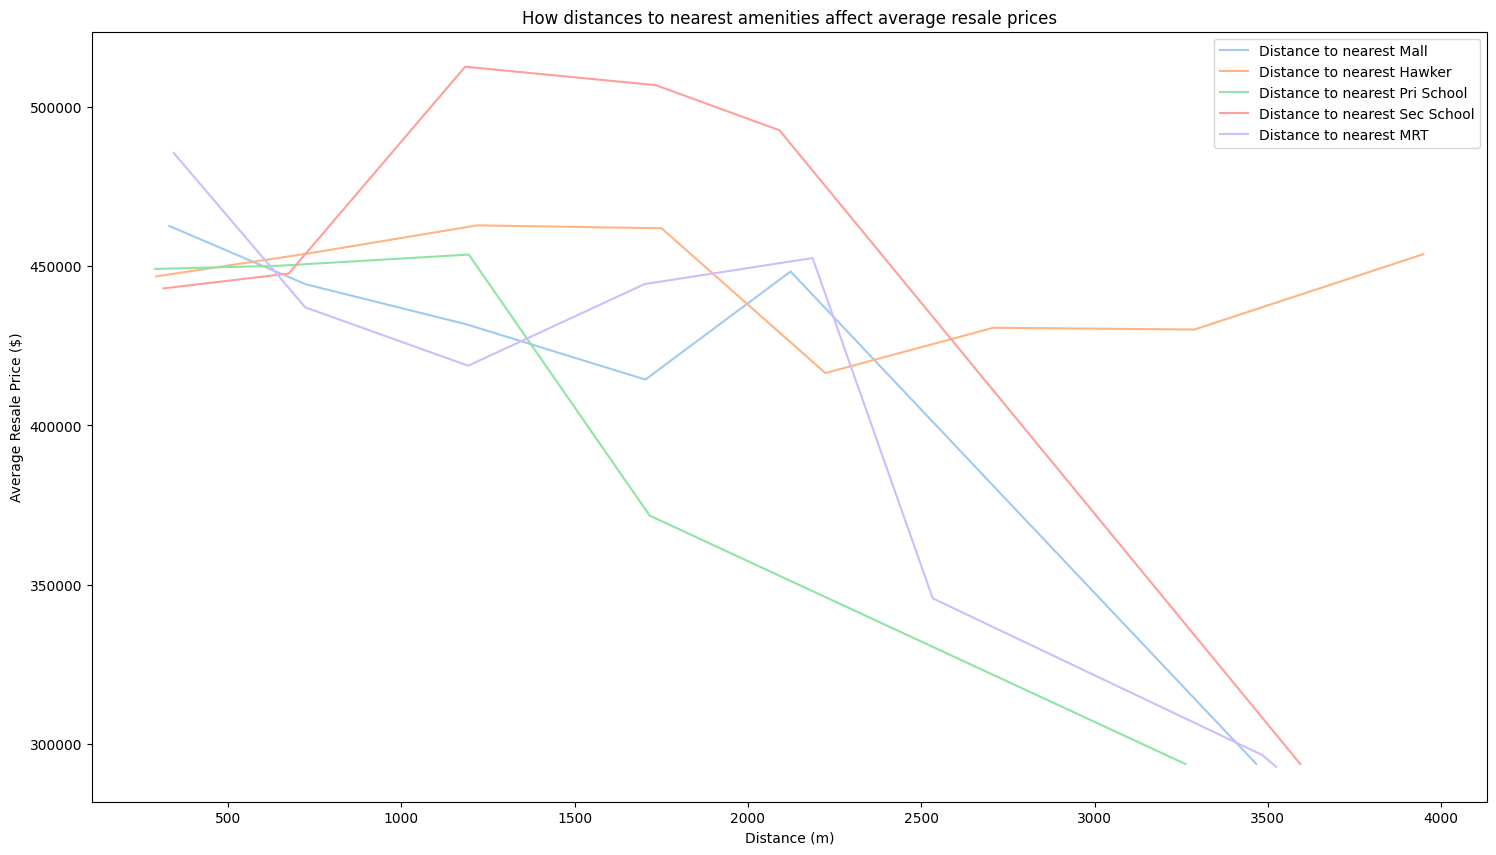

In [22]:
# Exploring distance of amenities against resale prices
# We will concatenate the resale prices back into the main dataset and bin the distances of different amenities to make it easier to chart
# We will then take the average prices of all the retail prices within the bin to use in the chart

merged_clean_train = pd.concat([clean_train, y], axis=1)

bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500]

merged_clean_train['Mall_Nearest_Distance_Bin'] = np.digitize(merged_clean_train['Mall_Nearest_Distance'],bins)
merged_clean_train['Hawker_Nearest_Distance_Bin'] = np.digitize(merged_clean_train['Hawker_Nearest_Distance'],bins)
merged_clean_train['PSch_Nearest_Distance_Bin'] = np.digitize(merged_clean_train['pri_sch_nearest_distance'],bins)
merged_clean_train['SSch_Nearest_Distance_Bin'] = np.digitize(merged_clean_train['sec_sch_nearest_dist'],bins)
merged_clean_train['MRT_Nearest_Distance_Bin'] = np.digitize(merged_clean_train['mrt_nearest_distance'],bins)

binned_mall = merged_clean_train.groupby('Mall_Nearest_Distance_Bin').agg({
    'Mall_Nearest_Distance': 'mean',
    'resale_price': 'mean'
})

binned_hawker = merged_clean_train.groupby('Hawker_Nearest_Distance_Bin').agg({
    'Hawker_Nearest_Distance': 'mean',
    'resale_price': 'mean'
})

binned_psch = merged_clean_train.groupby('PSch_Nearest_Distance_Bin').agg({
    'pri_sch_nearest_distance': 'mean',
    'resale_price': 'mean'
})

binned_ssch = merged_clean_train.groupby('SSch_Nearest_Distance_Bin').agg({
    'sec_sch_nearest_dist': 'mean',
    'resale_price': 'mean'
})

binned_mrt = merged_clean_train.groupby('MRT_Nearest_Distance_Bin').agg({
    'mrt_nearest_distance': 'mean',
    'resale_price': 'mean'
})

plt.figure(figsize=(18,10))
plt.plot(binned_mall['Mall_Nearest_Distance'], binned_mall['resale_price'], label='Distance to nearest Mall', color=palette[0])
plt.plot(binned_hawker['Hawker_Nearest_Distance'], binned_hawker['resale_price'], label='Distance to nearest Hawker', color=palette[1])
plt.plot(binned_psch['pri_sch_nearest_distance'], binned_psch['resale_price'], label='Distance to nearest Pri School', color=palette[2])
plt.plot(binned_ssch['sec_sch_nearest_dist'], binned_ssch['resale_price'], label='Distance to nearest Sec School', color=palette[3])
plt.plot(binned_mrt['mrt_nearest_distance'], binned_mrt['resale_price'], label='Distance to nearest MRT', color=palette[4])
plt.xlabel('Distance (m)')
plt.ylabel('Average Resale Price ($)')
plt.title('How distances to nearest amenities affect average resale prices')
plt.legend()

plt.show()


From the visualization above, we can see that the distance to the nearest hawker centre does not have a distinct relationship to the average resale prices. The prices are generally similar between different distances. However for the other 4 features, we can see quite a clear distinct relationship between the distance and average resale prices. As the distance increases, the average resale prices subsequently decreases. This strong relationship will help to build a more accurate model in predicting the resale prices.

We will next look at how the prices differ between the different planning zones

In [23]:
# As we want the planning zones pre-OHE, we will extract some columns from the train_df instead for our next 2 visualizations

zonal_df = train_df[['Tranc_Year', 'planning_area', 'resale_price']]
zonal_df = zones(zonal_df)
zonal_df

,Tranc_Year,planning_area,resale_price
0,2016,Central,680000.0
1,2012,Central,665000.0
2,2013,West,838000.0
3,2012,Central,550000.0
4,2017,North,298000.0
...,...,...,...
150629,2020,North,625000.0
150630,2017,West,455000.0
150631,2020,East,733000.0
150632,2016,Central,338000.0


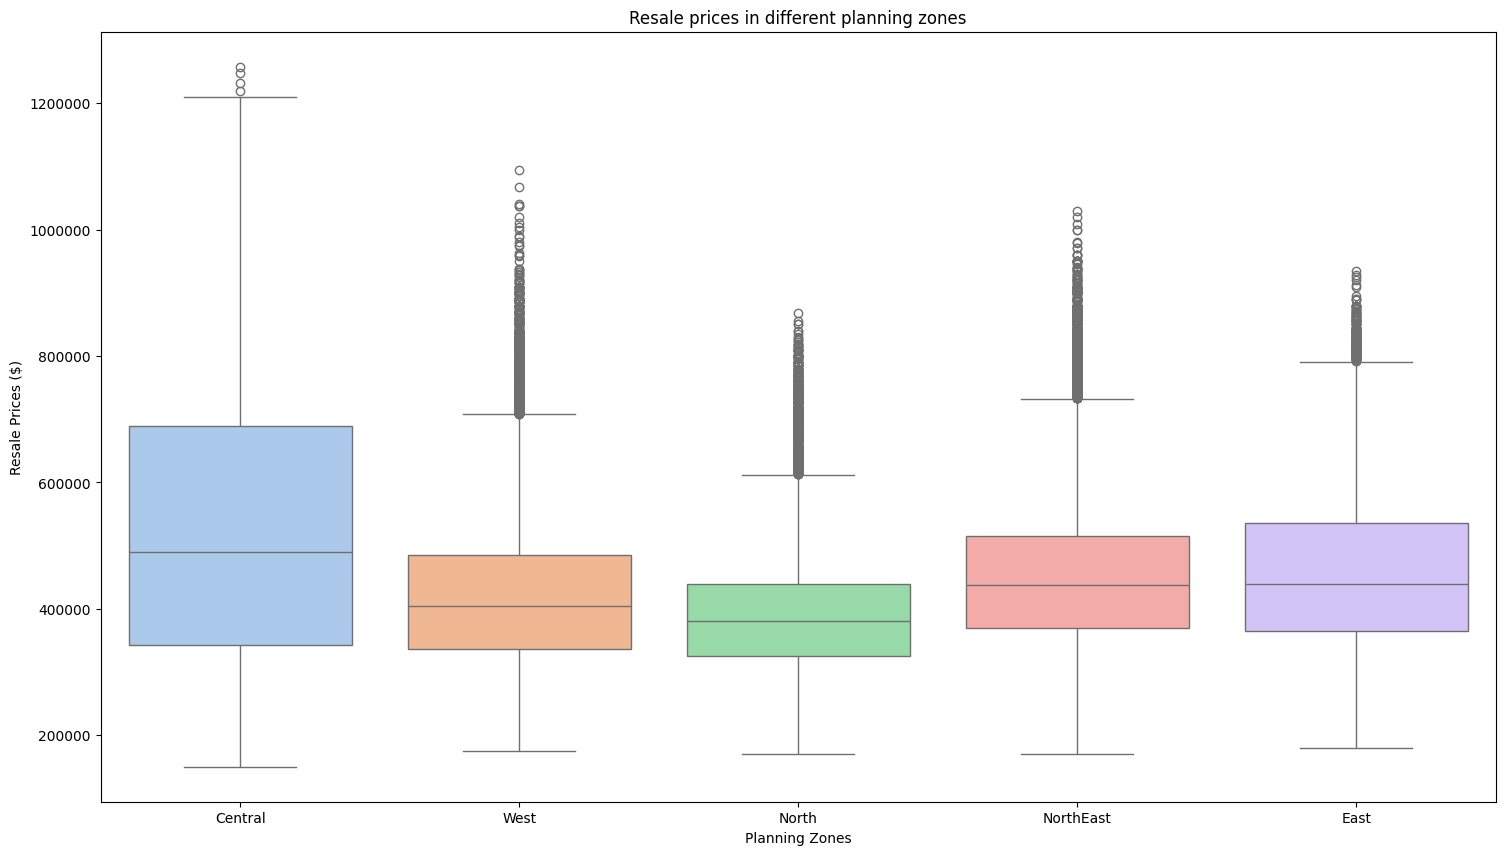

In [24]:
plt.figure(figsize = (18,10))
sns.boxplot(x='planning_area', y='resale_price', data=zonal_df, palette=palette)
plt.xlabel('Planning Zones')
plt.ylabel('Resale Prices ($)')
plt.title('Resale prices in different planning zones')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):}'))
plt.show()

For the chart above, it is very distinct how the HDB flats in the Central Area has higher prices as compared to the rest of the 4 planning zones. While the rest of the 4 zones are pretty similarly priced, the HDB flats in the North can be seen to have the lowest median price and the median price of the North Eastern and Eastern zones are the higher zones among the 4. The minimum prices recorded were consistent among the 5 planning zones. However the maximum prices vary greatly between Central and the other 4 zones. Among the 4 zones, again North came in at the lowest maximum while the Eastern zone records the highest. The clear differences between the planning zones will help to create a stronger model, especially when determining the higher prices.

Lastly, we will see how the resale prices differ from year to year.

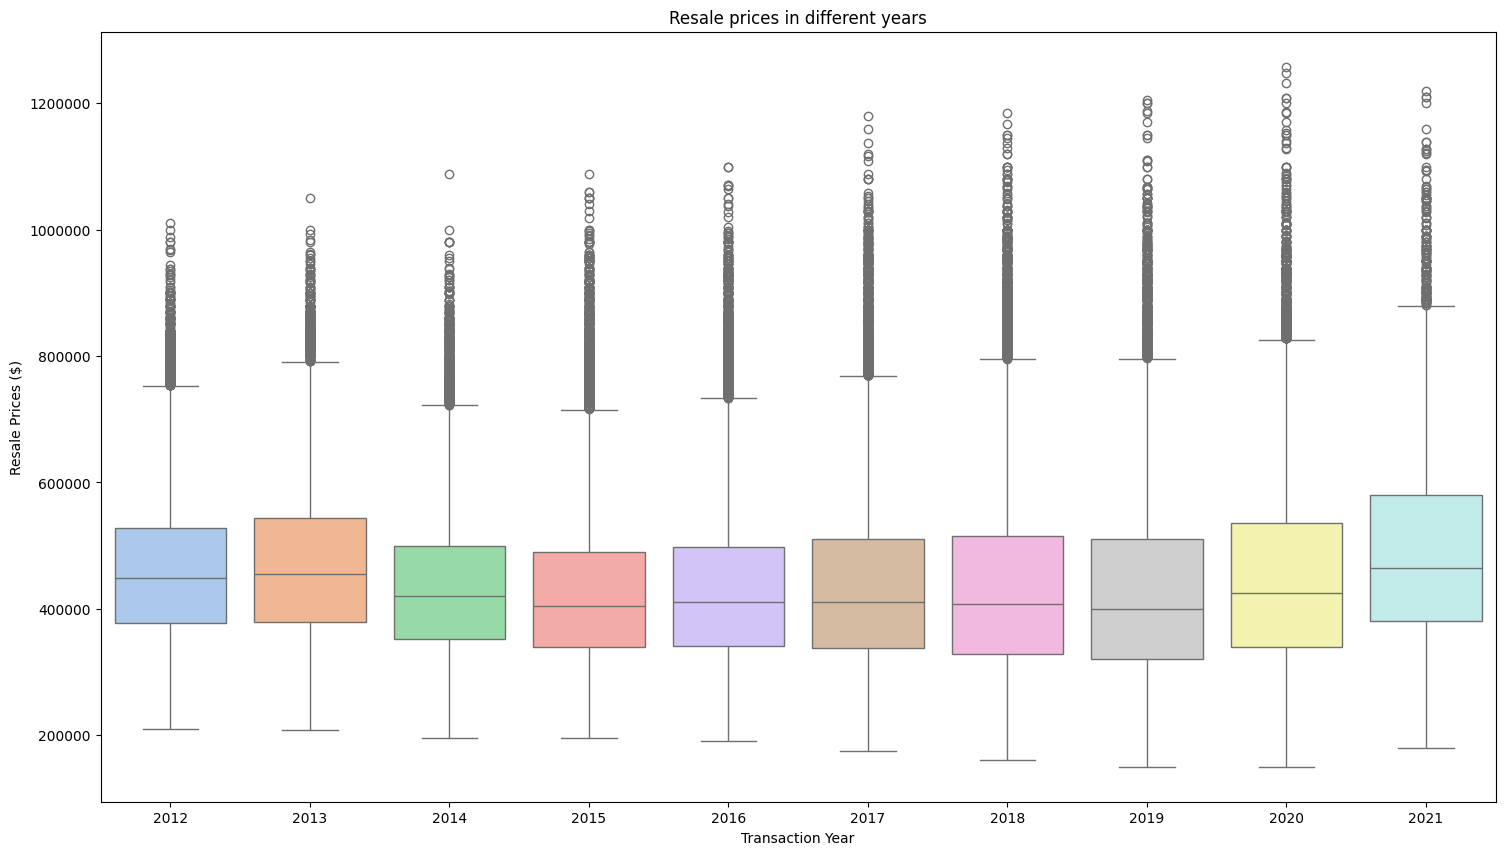

In [25]:
plt.figure(figsize = (18,10))
sns.boxplot(x='Tranc_Year', y='resale_price', data=zonal_df, palette=palette)
plt.xlabel('Transaction Year')
plt.ylabel('Resale Prices ($)')
plt.title('Resale prices in different years')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):}'))
plt.show()

With the data that we have from 2012 to 2021, we are able to make a comparison and see how the prices change over the years. From the chart above, we can see that the boxes of the boxplots are almost stagnant with small changes year-on-year. However from 2019 to 2021, we can see that these small changes point to the prices steadily rising. This is similar with the minimum values of the resale prices. They are generally stagnant, but the prices slowly dipped from 2012 to the lowest point in 2020. However in 2021, there was a considerable jump upwards in 2021 for the minimum prices. As for the maximum, the prices vary quite largely with a dip to the lowest point in 2015 and it continuously increases to about almost $100,000 higher in 2021. From this, we can foresee that the prices of the resale flats will continue to steadily increase, at least over the next few years, unless there is an external market factor coming into play.

### 3. Data Splitting

In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(clean_train, y, test_size=0.25, random_state=888)

### 4. Creating Baseline RMSE & R2 Scores using LinearRegression()

In [67]:
LRmodel = LinearRegression()
LRmodel.fit(X_train, y_train)
baseline = scorer(y_valid, LRmodel.predict(X_valid))
baseline_r2 = r2_score(y_valid, LRmodel.predict(X_valid))
print("Baseline RMSE score:", round(baseline, 3))
print("Baseline R2 score:", round(baseline_r2, 3))

Baseline RMSE score: 55766.691
Baseline R2 score: 0.848


In [68]:
base_train_score = LRmodel.score(X_train, y_train)
base_test_score = LRmodel.score(X_valid, y_valid)
print("Train Score:", round(base_train_score, 3))
print("Test Score:", round(base_test_score, 3))

Train Score: 0.848
Test Score: 0.848


In [69]:
scores_dict['Linear Regression\n(Baseline)'] = (round(baseline_r2, 3))

### 5. Feature Engineering

#### 5.1 Scale all datasets using StandardScaler()

In [29]:
X_train_scaled = scaler(X_train)
X_valid_scaled = scaler(X_valid)

#### 5.2 Create additional columns for all numerical columns, with the squares and cubes of the column values

In [30]:
X_train_FE = square_cube(X_train_scaled)
X_valid_FE = square_cube(X_valid_scaled)

### 6. Model Development

We will create 3 different models: LinearRegression and 2 types of regularized models, Lasso and Ridge. From there we will compare the scores and cross-validated scores to choose the final model for the competition submission.

#### 6.1 LinearRegression()

In [31]:
LRmodel = LinearRegression()
LRmodel.fit(X_train_FE, y_train)
LR_score = scorer(y_valid, LRmodel.predict(X_valid_FE))
print("Linear Regression RMSE score:", round(LR_score, 3))

Linear Regression RMSE score: 52192.46


In [32]:
LR_train_score = LRmodel.score(X_train_FE, y_train)
LR_test_score = LRmodel.score(X_valid_FE, y_valid)
print("Linear Regression Train Score:", round(LR_train_score, 3))
print("Linear Regression Test Score:", round(LR_test_score, 3))

Linear Regression Train Score: 0.868
Linear Regression Test Score: 0.867


Create a Pipeline for cross-validation for LinearRegression(). This is done to prevent data leakage between each fold of the cross validation.

In [33]:
lr_pipe = Pipeline(steps=[
    ('scale', FunctionTransformer(scaler, validate=False)),
    ('square and cube', FunctionTransformer(square_cube, validate=False)),
    ('ml model', LRmodel)
])

Push clean data into CV Pipeline for cross validation

In [34]:
LRmodel = LinearRegression()
rmse_scores = np.mean(cross_val_score(lr_pipe, X_train, y_train, cv=10, verbose=3, scoring='neg_root_mean_squared_error'))
r2_scores = np.mean(cross_val_score(lr_pipe, X_train, y_train, cv=10, verbose=3, scoring='r2'))
print('CV RMSE Score:', round((rmse_scores*(-1)),3))
print('CV R2 Score:', round(r2_scores,3))

[CV] END ........................... score: (test=-53368.574) total time=  22.0s
[CV] END ........................... score: (test=-52109.409) total time=  21.7s
[CV] END ........................... score: (test=-52131.504) total time=  20.9s
[CV] END ........................... score: (test=-52049.321) total time=  22.7s
[CV] END ........................... score: (test=-51871.692) total time=   7.4s
[CV] END ........................... score: (test=-53906.143) total time=   0.9s
[CV] END ........................... score: (test=-53038.803) total time=   0.9s
[CV] END ........................... score: (test=-52738.107) total time=   0.9s
[CV] END ........................... score: (test=-52201.104) total time=   1.2s
[CV] END ........................... score: (test=-51500.920) total time=   0.9s
[CV] END ................................ score: (test=0.863) total time=   0.9s
[CV] END ................................ score: (test=0.869) total time=   0.9s
[CV] END ...................

In [35]:
scores_dict['Linear Regression'] = (round(r2_scores,3))

#### 6.2 Lasso()

We will first use GridSearchCV to find the best alpha. The code was run several times using different values of alpha, and the final choices are left in the params below.

In [36]:
params = {
    'alpha': [0.01, 0.1, 1]
}

In [37]:
Lasso_model = Lasso()
GS = GridSearchCV(estimator = Lasso_model, param_grid = params, cv = 4, scoring = 'neg_root_mean_squared_error', verbose = 3)
GS.fit(X_train_FE, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV 1/4] END ...................alpha=0.01;, score=-52439.900 total time=  10.0s
[CV 2/4] END ...................alpha=0.01;, score=-52041.720 total time=   7.1s
[CV 3/4] END ...................alpha=0.01;, score=-52761.296 total time=   9.1s
[CV 4/4] END ...................alpha=0.01;, score=-51854.976 total time=   6.8s
[CV 1/4] END ....................alpha=0.1;, score=-52439.837 total time=   9.2s
[CV 2/4] END ....................alpha=0.1;, score=-52041.725 total time=   7.1s
[CV 3/4] END ....................alpha=0.1;, score=-52761.660 total time=   9.0s
[CV 4/4] END ....................alpha=0.1;, score=-51854.672 total time=   7.0s
[CV 1/4] END ......................alpha=1;, score=-52440.437 total time=   9.0s
[CV 2/4] END ......................alpha=1;, score=-52042.026 total time=   6.9s
[CV 3/4] END ......................alpha=1;, score=-52765.315 total time=   8.7s
[CV 4/4] END ......................alpha=1;, scor

GridSearchCV(cv=4, estimator=Lasso(), param_grid={'alpha': [0.01, 0.1, 1]},
             scoring='neg_root_mean_squared_error', verbose=3)

From the GridSearchCV, the best scoring alpha value seems to be 1. Hence we will use that for our modelling.

In [38]:
Lasso_model = Lasso(alpha=1)
Lasso_model.fit(X_train_FE, y_train)
Lasso_score = scorer(y_valid, Lasso_model.predict(X_valid_FE))
print("Lasso Regression RMSE score:", round(Lasso_score, 3))

Lasso Regression RMSE score: 52216.951


In [39]:
Lasso_train_score = Lasso_model.score(X_train_FE, y_train)
Lasso_test_score = Lasso_model.score(X_valid_FE, y_valid)
print("Lasso Regression Train Score:", round(Lasso_train_score, 3))
print("Lasso Regression Test Score:", round(Lasso_test_score, 3))

Lasso Regression Train Score: 0.868
Lasso Regression Test Score: 0.867


Create a Pipeline for cross-validation for Lasso(). This is done to prevent data leakage between each fold of the cross validation.

In [40]:
lasso_pipe = Pipeline(steps=[
    ('scale', FunctionTransformer(scaler, validate=False)),
    ('square and cube', FunctionTransformer(square_cube, validate=False)),
    ('ml model', Lasso_model)
])

In [41]:
Lasso_model = Lasso(alpha=0.01)
lasso_rmse_scores = np.mean(cross_val_score(lasso_pipe, X_train, y_train, cv=10, verbose=3, scoring='neg_root_mean_squared_error'))
lasso_r2_scores = np.mean(cross_val_score(lasso_pipe, X_train, y_train, cv=10, verbose=3, scoring='r2'))
print('CV RMSE Score:', round((lasso_rmse_scores*(-1)),3))
print('CV R2 Score:', round(lasso_r2_scores,3))

[CV] END ........................... score: (test=-53393.199) total time=   8.5s
[CV] END ........................... score: (test=-52118.338) total time=  11.5s
[CV] END ........................... score: (test=-52117.136) total time=  10.6s
[CV] END ........................... score: (test=-52044.411) total time=   8.8s
[CV] END ........................... score: (test=-51867.902) total time=  11.7s
[CV] END ........................... score: (test=-54058.771) total time=  13.9s
[CV] END ........................... score: (test=-53034.811) total time=   8.6s
[CV] END ........................... score: (test=-52702.846) total time=  12.2s
[CV] END ........................... score: (test=-52192.731) total time=  12.6s
[CV] END ........................... score: (test=-51499.046) total time=  12.3s
[CV] END ................................ score: (test=0.863) total time=  10.9s
[CV] END ................................ score: (test=0.869) total time=  13.6s
[CV] END ...................

In [42]:
scores_dict['Lasso Regression'] = (round(lasso_r2_scores,3))

#### 6.3 Ridge()

Similarly, we will use GridSearch CV first to find the best alpha. The last run of the search with the values are left below.

In [43]:
params = {
    'alpha': [8, 10, 12]
}

In [44]:
Ridge_model = Ridge()
GS = GridSearchCV(estimator = Ridge_model, param_grid = params, cv = 4, scoring = 'neg_root_mean_squared_error', verbose = 3)
GS.fit(X_train_FE, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits
[CV 1/4] END ......................alpha=8;, score=-52467.338 total time=   0.0s
[CV 2/4] END ......................alpha=8;, score=-52060.020 total time=   0.0s
[CV 3/4] END ......................alpha=8;, score=-52793.522 total time=   0.0s
[CV 4/4] END ......................alpha=8;, score=-51836.089 total time=   0.0s
[CV 1/4] END .....................alpha=10;, score=-52478.236 total time=   0.0s
[CV 2/4] END .....................alpha=10;, score=-52068.365 total time=   0.0s
[CV 3/4] END .....................alpha=10;, score=-52802.216 total time=   0.0s
[CV 4/4] END .....................alpha=10;, score=-51835.546 total time=   0.0s
[CV 1/4] END .....................alpha=12;, score=-52489.762 total time=   0.0s
[CV 2/4] END .....................alpha=12;, score=-52077.674 total time=   0.0s
[CV 3/4] END .....................alpha=12;, score=-52811.290 total time=   0.0s
[CV 4/4] END .....................alpha=12;, scor

GridSearchCV(cv=4, estimator=Ridge(), param_grid={'alpha': [8, 10, 12]},
             scoring='neg_root_mean_squared_error', verbose=3)

From the GridSearchCV, the best scoring alpha value seems to be 10. Hence we will use that for our modelling.

In [45]:
Ridge_model = Ridge(alpha=10)
Ridge_model.fit(X_train_FE, y_train)
Ridge_score = scorer(y_valid, Ridge_model.predict(X_valid_FE))
print("Ridge Regression RMSE score:", round(Ridge_score, 3))

Ridge Regression RMSE score: 52267.854


In [46]:
Ridge_train_score = Ridge_model.score(X_train_FE, y_train)
Ridge_test_score = Ridge_model.score(X_valid_FE, y_valid)
print("Ridge Regression Train Score:", round(Ridge_train_score, 3))
print("Ridge Regression Test Score:", round(Ridge_test_score, 3))

Ridge Regression Train Score: 0.868
Ridge Regression Test Score: 0.866


Create a Pipeline for cross-validation for Ridge(). This is done to prevent data leakage between each fold of the cross validation.

In [47]:
ridge_pipe = Pipeline(steps=[
    ('scale', FunctionTransformer(scaler, validate=False)),
    ('square and cube', FunctionTransformer(square_cube, validate=False)),
    ('ml model', Ridge_model)
])

In [48]:
Ridge_model = Ridge(alpha=10)
ridge_rmse_scores = np.mean(cross_val_score(ridge_pipe, X_train, y_train, cv=10, verbose=3, scoring='neg_root_mean_squared_error'))
ridge_r2_scores = np.mean(cross_val_score(ridge_pipe, X_train, y_train, cv=10, verbose=3, scoring='r2'))
print('CV RMSE Score:', round((ridge_rmse_scores*(-1)),3))
print('CV R2 Score:', round(ridge_r2_scores,3))

[CV] END ........................... score: (test=-53428.320) total time=   0.7s
[CV] END ........................... score: (test=-52136.898) total time=   0.7s
[CV] END ........................... score: (test=-52148.318) total time=   0.7s
[CV] END ........................... score: (test=-52058.683) total time=   0.7s
[CV] END ........................... score: (test=-51888.179) total time=   0.7s
[CV] END ........................... score: (test=-54212.955) total time=   0.7s
[CV] END ........................... score: (test=-53067.278) total time=   0.7s
[CV] END ........................... score: (test=-52709.569) total time=   0.7s
[CV] END ........................... score: (test=-52204.082) total time=   0.7s
[CV] END ........................... score: (test=-51503.770) total time=   0.7s
[CV] END ................................ score: (test=0.863) total time=   0.7s
[CV] END ................................ score: (test=0.869) total time=   0.7s
[CV] END ...................

In [49]:
scores_dict['Ridge Regression'] = (round(ridge_r2_scores,3))

#### 6.4 Comparison of the 3 models and choosing the final model to be used

Compilation of the scores of the 3 models above and baseline score:

__Baseline Score__</br>
RMSE score: 55766.691</br>
R2 Train Score: 0.848</br>
R2 Test Score: 0.848</br>

__LinearRegression()__</br>
RMSE score: 52192.460</br>
R2 Train Score: 0.868</br>
R2 Test Score: 0.867</br>
CV RMSE Score: 52491.558</br>
CV R2 Score: 0.866</br>

__Lasso()__</br>
RMSE score: 52212.605</br>
R2 Train Score: 0.868</br>
R2 Test Score: 0.867</br>
CV RMSE Score: 52501.706</br>
CV R2 Score: 0.866</br>

__Ridge()__</br>
RMSE score: 52267.854</br>
R2 Train Score: 0.868</br>
R2 Test Score: 0.866</br>
CV RMSE Score: 52535.805</br>
CV R2 Score: 0.866</br>

Creating new dataframes for validation set, with true and predicted values of the resale prices for visualizations.

In [50]:
# Linear Regression
LR_preds = pd.DataFrame(y_valid)
LRmodel.fit(X_train_FE, y_train)
LR_preds['predictions'] = LRmodel.predict(X_valid_FE)
LR_preds['predictions'] = LR_preds['predictions'].round(1)
LR_preds

,resale_price,predictions
80712,360000.0,384412.5
12444,718000.0,675196.0
86799,650000.0,548109.1
73373,470000.0,483392.3
59424,560000.0,506900.2
...,...,...
47077,750000.0,680805.0
123193,353000.0,399927.7
97506,518000.0,484671.0
17393,330000.0,350136.5


In [51]:
# Lasso
Lasso_preds = pd.DataFrame(y_valid)
Lasso_model.fit(X_train_FE, y_train)
Lasso_preds['predictions'] = Lasso_model.predict(X_valid_FE)
Lasso_preds['predictions'] = Lasso_preds['predictions'].round(1)
Lasso_preds

,resale_price,predictions
80712,360000.0,384423.6
12444,718000.0,675176.0
86799,650000.0,548101.4
73373,470000.0,483314.7
59424,560000.0,506903.6
...,...,...
47077,750000.0,680929.9
123193,353000.0,400025.3
97506,518000.0,484670.9
17393,330000.0,350129.9


In [52]:
# Ridge
Ridge_preds = pd.DataFrame(y_valid)
Ridge_model.fit(X_train_FE, y_train)
Ridge_preds['predictions'] = Ridge_model.predict(X_valid_FE)
Ridge_preds['predictions'] = Ridge_preds['predictions'].round(1)
Ridge_preds

,resale_price,predictions
80712,360000.0,384307.6
12444,718000.0,674517.7
86799,650000.0,548919.5
73373,470000.0,483137.2
59424,560000.0,506772.1
...,...,...
47077,750000.0,680143.7
123193,353000.0,399731.4
97506,518000.0,485268.1
17393,330000.0,350139.6


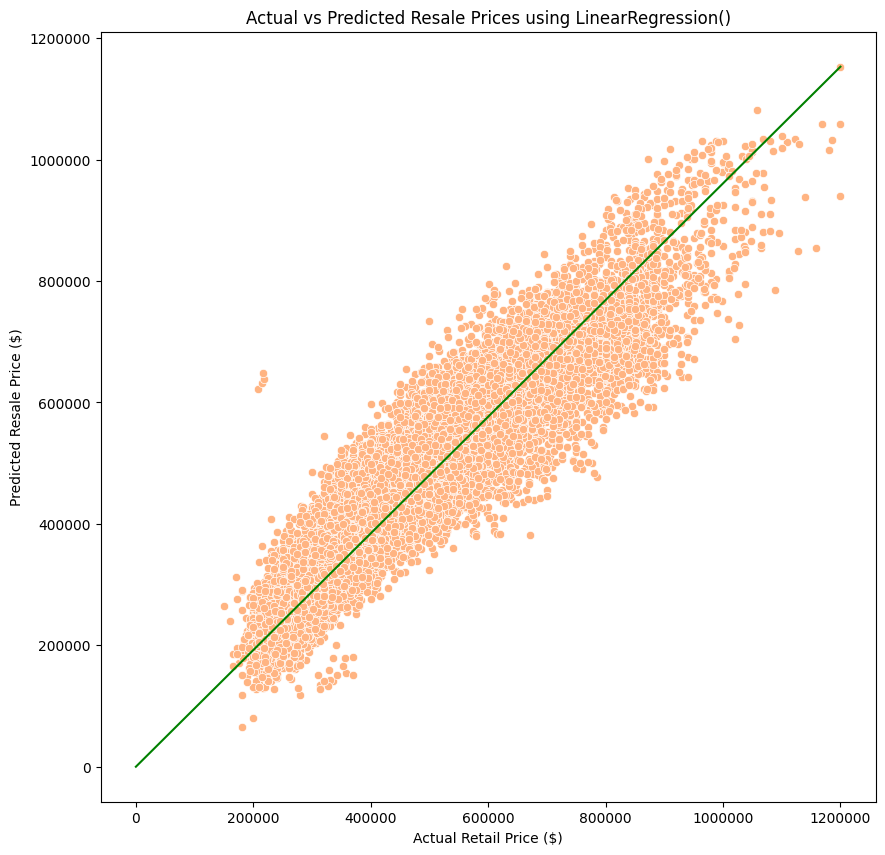

In [53]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='resale_price', y='predictions', data=LR_preds, color=palette[1])
plt.plot([0, max(LR_preds['resale_price'].max(), LR_preds['resale_price'].max())], 
         [0, max(LR_preds['predictions'].max(), LR_preds['predictions'].max())], 
         color='green')
plt.xlabel('Actual Retail Price ($)')
plt.ylabel('Predicted Resale Price ($)')
plt.title('Actual vs Predicted Resale Prices using LinearRegression()')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):}'))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):}'))
plt.show()

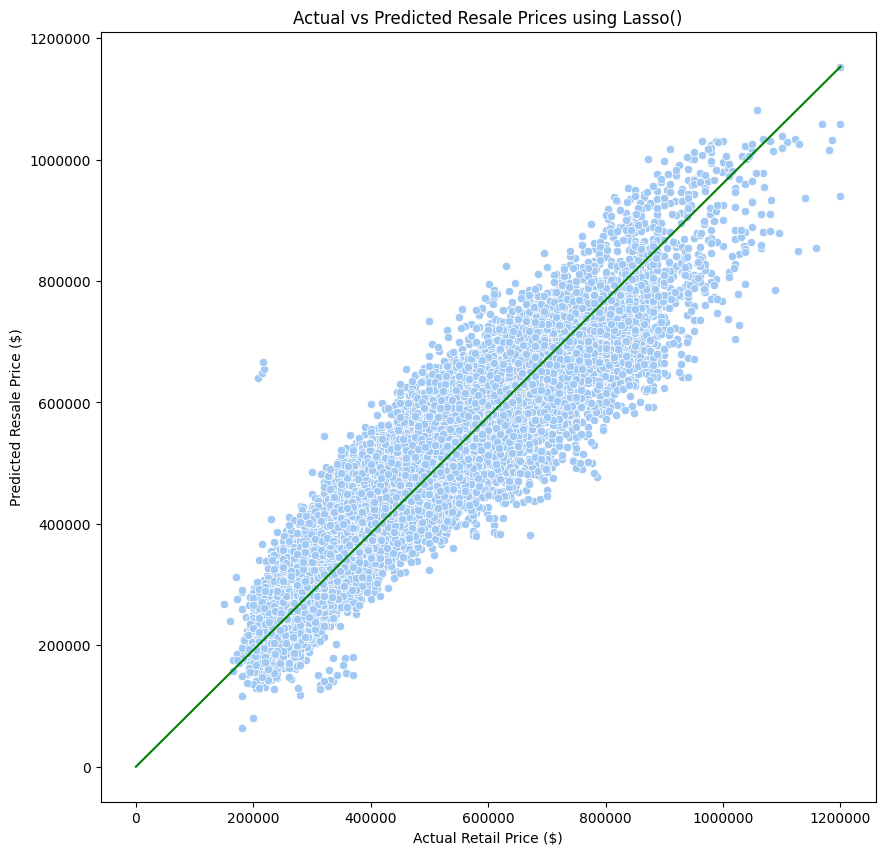

In [54]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='resale_price', y='predictions', data=Lasso_preds, color=palette[0])
plt.plot([0, max(Lasso_preds['resale_price'].max(), Lasso_preds['resale_price'].max())], 
         [0, max(Lasso_preds['predictions'].max(), Lasso_preds['predictions'].max())], 
         color='green')
plt.xlabel('Actual Retail Price ($)')
plt.ylabel('Predicted Resale Price ($)')
plt.title('Actual vs Predicted Resale Prices using Lasso()')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):}'))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):}'))
plt.show()

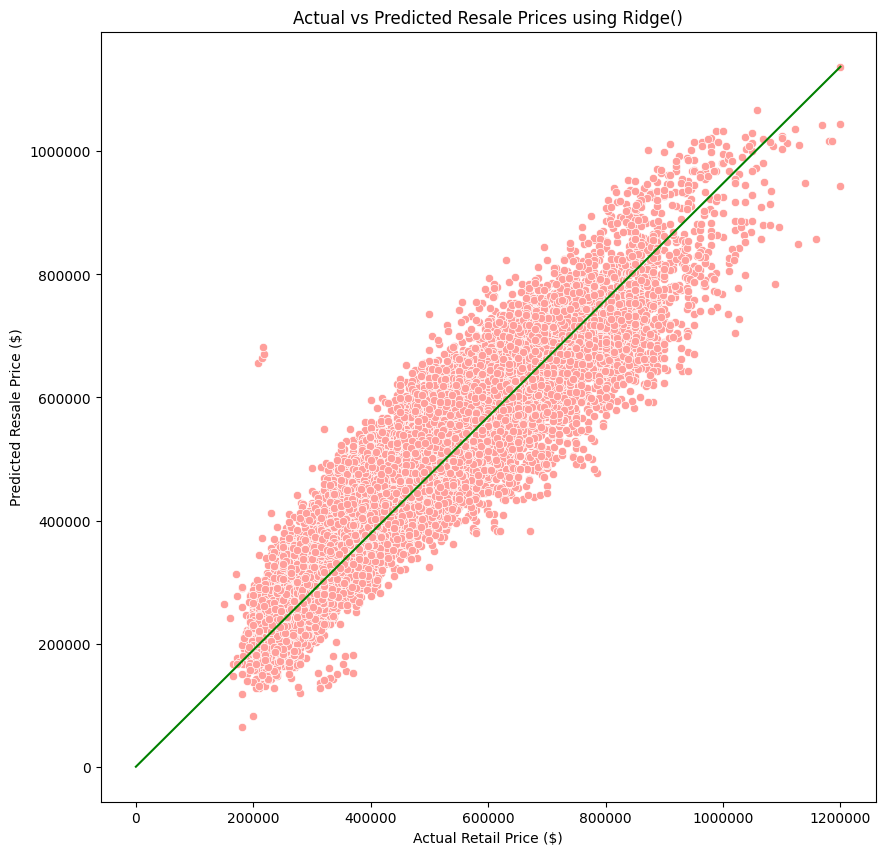

In [55]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='resale_price', y='predictions', data=Ridge_preds, color=palette[3])
plt.plot([0, max(Ridge_preds['resale_price'].max(), Ridge_preds['resale_price'].max())], 
         [0, max(Ridge_preds['predictions'].max(), Ridge_preds['predictions'].max())], 
         color='green')
plt.xlabel('Actual Retail Price ($)')
plt.ylabel('Predicted Resale Price ($)')
plt.title('Actual vs Predicted Resale Prices using Ridge()')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):}'))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):}'))
plt.show()

From the above results, we find that there are a very small differences between the results of the 3 models. However, looking at the Root Mean Square Error Average, which is the scoring metrics for the competition, the LinearRegression() model edges out a little better than the other two models. Hence, for the final model, we will be using the LinearRegression() model to predict the resale prices of the test set for our competition submission.

### 7. Competition Submission

In this step, we will reprocess and refit the whole data in the train.csv, prior to splitting using the train test split, into the LinearRegression() model. We will then feed the model the data from the test.csv file for the resale prices predictions. The results will be formatted as per the Kaggle submission requirements and exported as a csv file.

Preprocess the datasets

In [56]:
processed_train = square_cube(scaler(clean_train))
processed_test = square_cube(scaler(clean_test))

Refit whole train data into LR model and make predictions for resale prices in the test data

In [57]:
LRmodel.fit(processed_train, y)
test_preds = LRmodel.predict(processed_test)
test_preds = pd.DataFrame(test_preds, columns=['Predicted']).round(1)
test_preds

,Predicted
0,351512.0
1,483652.2
2,368060.1
3,314536.4
4,479806.3
...,...
16732,356369.6
16733,499383.9
16734,394265.9
16735,468144.1


Create submission file for Kaggle competition

In [58]:
test_preds['id'] = test_df['id']
submission = test_preds.reindex(columns=['id', 'Predicted'])
submission.rename(columns={'id': 'Id'}, inplace=True)
submission.set_index('Id', inplace=True)
submission.to_csv('submissions.csv')

### XGBoost Regressor
Using XGBoost's Regressor model, we will first perform a gridsearch to find the best hyperparameters for the dataset.

In [60]:
import xgboost as xgb

xgmodel = xgb.XGBRegressor()

params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.3],
}

xgb_grid_search = GridSearchCV(estimator=xgmodel, param_grid=params, 
                           cv=3, n_jobs=-1, verbose=3, scoring='r2')

xgb_grid_search.fit(X_train_FE, y_train)

print("Best Hyperparameters:", xgb_grid_search.best_params_)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best Hyperparameters: {'gamma': 0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200}


With some of the best hyperparameters tuned, we will input them into a newly instantiated model and run predictions to get the R2 score.

In [61]:
xgbmodel = xgb.XGBRegressor(n_estimators=200, gamma=0, learning_rate=0.2, max_depth=7)
xgbmodel.fit(X_train_FE, y_train)
xgbscore = r2_score(y_valid, xgbmodel.predict(X_valid_FE))
print("XGB Regression R2 score:", round(xgbscore, 3))

XGB Regression R2 score: 0.957


In [62]:
scores_dict['XGBoost Regressor'] = (round(xgbscore, 3))

Creating a scatter plot of actual values vs predicted values using XGBoost Regressor

In [71]:
# XGBoost
xgb_preds = pd.DataFrame(y_valid)
xgb_preds['predictions'] = xgbmodel.predict(X_valid_FE)
xgb_preds['predictions'] = xgb_preds['predictions'].round(1)
xgb_preds

,resale_price,predictions
80712,360000.0,363685.68750
12444,718000.0,662971.18750
86799,650000.0,642209.62500
73373,470000.0,466819.59375
59424,560000.0,523553.09375
...,...,...
47077,750000.0,709342.37500
123193,353000.0,364171.18750
97506,518000.0,501402.09375
17393,330000.0,356700.40625


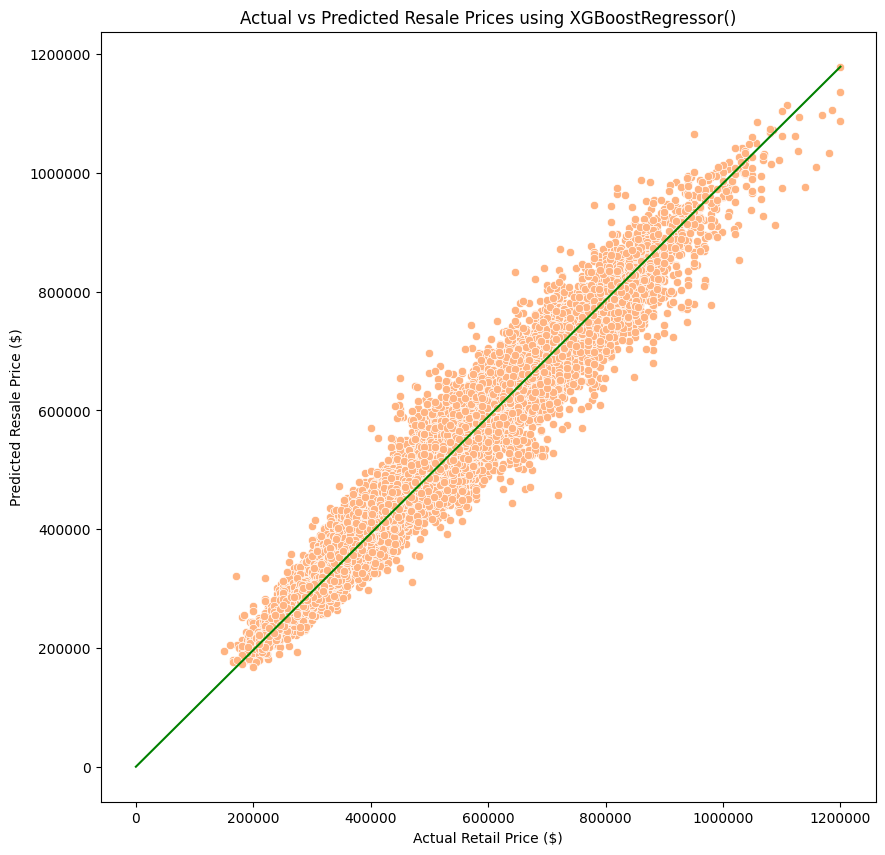

In [72]:
plt.figure(figsize = (10,10))
sns.scatterplot(x='resale_price', y='predictions', data=xgb_preds, color=palette[1])
plt.plot([0, max(xgb_preds['resale_price'].max(), xgb_preds['resale_price'].max())], 
         [0, max(xgb_preds['predictions'].max(), xgb_preds['predictions'].max())], 
         color='green')
plt.xlabel('Actual Retail Price ($)')
plt.ylabel('Predicted Resale Price ($)')
plt.title('Actual vs Predicted Resale Prices using XGBoostRegressor()')
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):}'))
ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):}'))
plt.show()

### Model Comparison

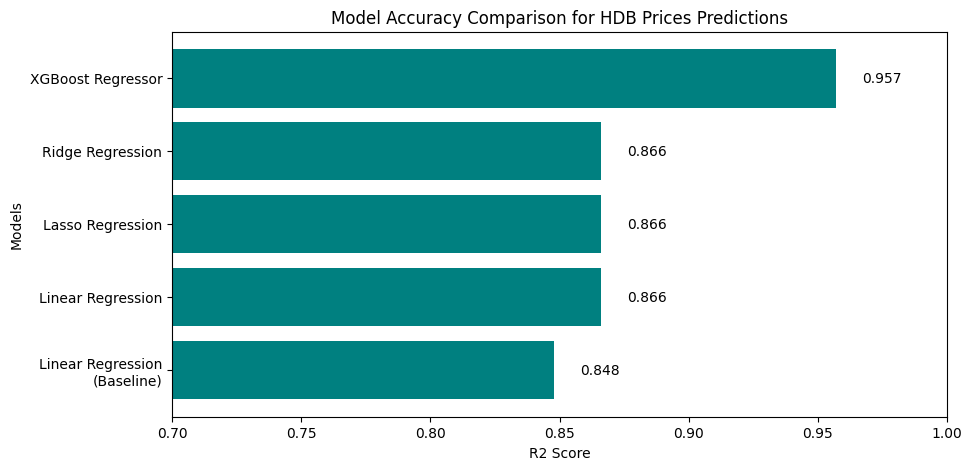

In [73]:
sorted_dict = sorted(scores_dict.items(), key=lambda item: item[1])
sorted_dict = {model: accuracy for model, accuracy in sorted_dict}

model_names = list(sorted_dict.keys())
accuracies = list(sorted_dict.values())

plt.figure(figsize=(10,5), facecolor='white')
ax = plt.barh(model_names, accuracies, color='teal')
plt.title('Model Accuracy Comparison for HDB Prices Predictions')
plt.ylabel('Models')
plt.xlabel('R2 Score')

for bar, accuracy in zip(ax, accuracies):
    plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, f'{accuracy:.3f}', ha='left', va='center')

plt.xlim(0.7, 1)

plt.show()

From the chart above, while basic regression models, both regularized and non-regularized, can achieve R2 scores of up to 0.866, the simple yet powerful gradient boosted model, XGBoost, far outperforms the traditional regression models. With an R2 score of 0.957 and very little computational resources required to run the model, we would definitely recommend the XGBoost Regressor model to predict future HDB prices effectively.